<a href="https://colab.research.google.com/github/nurchamidah/nurchamidah-sales-performance-damc-mdh/blob/main/StudyCase_Nur_Chamidah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Package

In [14]:
#install package pandasai
!pip install pandasai

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [114]:
#read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1hagoD_9TJAvSQ7c-Y9DJxH5Xk0pG4sG6KW75omoVFDM/edit#gid=1666191194'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

df = pd.read_csv(sheet_url_trf)
df.head()

https://docs.google.com/spreadsheets/d/1hagoD_9TJAvSQ7c-Y9DJxH5Xk0pG4sG6KW75omoVFDM/export?format=csv&gid=1666191194


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small
3,10100,49,34.47,1/6/2003 0:00,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small
4,10101,25,100.00,1/9/2003 0:00,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium


# Data view and data cleaning

In [17]:
# @title View the table
# Check the table, from the data type, row, and empty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 220.8+ KB


In [18]:
# change date type
df_cleaned = df.copy()
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])

In [98]:
# @title Add New Column (Revenue)
# add new column (revenue)
df_cleaned['REVENUE'] = df_cleaned['QUANTITYORDERED'] * df_cleaned['PRICEEACH']

df_cleaned

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00
...,...,...,...,...,...,...,...,...,...,...,...
2819,10425,49,100.00,2005-05-31,In Process,Trucks and Buses,S24_2300,La Rochelle Gifts,Nantes,Medium,4900.00
2820,10425,31,33.24,2005-05-31,In Process,Classic Cars,S24_2840,La Rochelle Gifts,Nantes,Small,1030.44
2821,10425,41,86.68,2005-05-31,In Process,Trucks and Buses,S32_1268,La Rochelle Gifts,Nantes,Medium,3553.88
2822,10425,11,43.83,2005-05-31,In Process,Trucks and Buses,S32_2509,La Rochelle Gifts,Nantes,Small,482.13


Here, I add new column called Revenue. To calculate the revenue for each transaction, you can create a new column called “revenue” by multiplying the “quantityordered” (number of items purchased) with priceeach (the price per item).

In [20]:
# @title Check Typo
# Using looping
for col_name in ['STATUS', 'PRODUCTLINE', 'CUSTOMERNAME', 'CITY', 'DEALSIZE']:
    print(df_cleaned[col_name].value_counts(),'\n')

Shipped       2618
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64 

Classic Cars        967
Vintage Cars        608
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64 

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Auto-Moto Classics Inc.           8
Royale Belge                      8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 92, dtype: int64 

Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
                 ... 
South Brisbane     15
Los Angeles        14
Munich             14
Burbank       

In [21]:
# @title Handle Missing Value
df_cleaned.isna().sum()


ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERDATE          0
STATUS             0
PRODUCTLINE        0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
DEALSIZE           0
REVENUE            0
dtype: int64

In [23]:
# @title Check for Duplicate
duplicate = df_cleaned[df_cleaned.duplicated()]
duplicate

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
121,10111,28,64.33,2003-03-25,Shipped,Vintage Cars,S18_2957,Mini Wheels Co.,San Francisco,Small,1801.24


In [27]:
# delete the duplicate data
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00
...,...,...,...,...,...,...,...,...,...,...,...
2819,10425,49,100.00,2005-05-31,In Process,Trucks and Buses,S24_2300,La Rochelle Gifts,Nantes,Medium,4900.00
2820,10425,31,33.24,2005-05-31,In Process,Classic Cars,S24_2840,La Rochelle Gifts,Nantes,Small,1030.44
2821,10425,41,86.68,2005-05-31,In Process,Trucks and Buses,S32_1268,La Rochelle Gifts,Nantes,Medium,3553.88
2822,10425,11,43.83,2005-05-31,In Process,Trucks and Buses,S32_2509,La Rochelle Gifts,Nantes,Small,482.13


In [30]:
duplicate

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE


# EDA

In [86]:
# @title Which product lines have the highest and lowest sales?

In [85]:
agg_payment = df_cleaned.groupby('PRODUCTLINE', as_index=False).agg({'REVENUE' : 'sum'})
agg_payment_sorted = agg_payment.sort_values('REVENUE', ascending=False)
agg_payment_sorted

,PRODUCTLINE,REVENUE
0,Classic Cars,2968546.40
6,Vintage Cars,1644212.05
1,Motorcycles,971086.29
5,Trucks and Buses,947355.18
2,Planes,877942.21
3,Ships,677940.40
4,Trains,203804.26


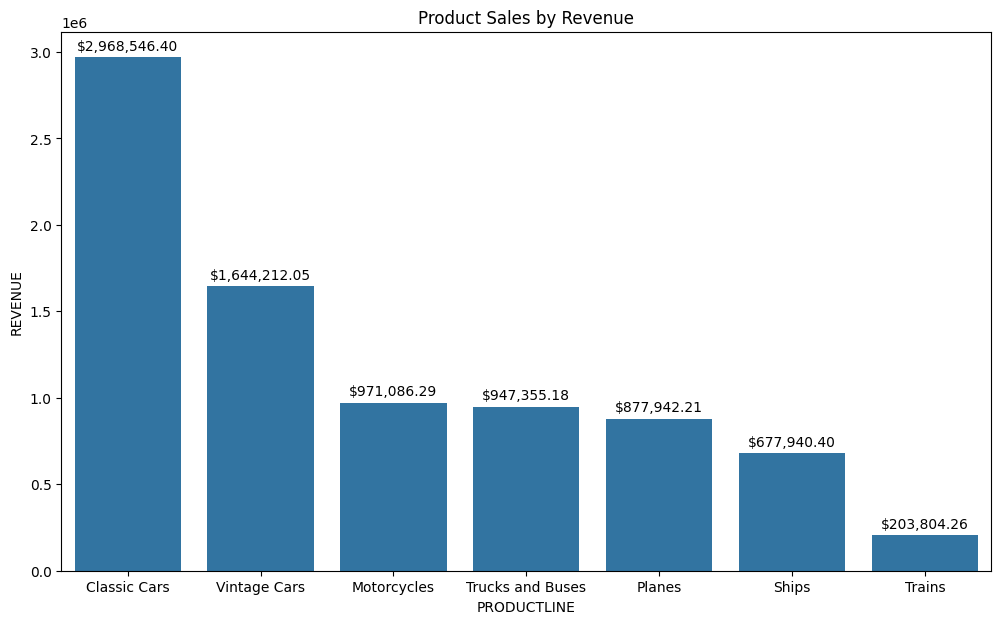

In [52]:
plt.rcParams['figure.figsize'] = (12,7)
#create the bar plot
ax = sns.barplot(data = agg_payment_sorted, x = 'PRODUCTLINE', y = 'REVENUE')
# Annotate each bar with revenue values
for p in ax.patches:
    plt.annotate(f"${p.get_height():,.2f}", xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')
#set axis labels and title
plt.xlabel('PRODUCTLINE')
plt.ylabel('REVENUE')
plt.title('Product Sales by Revenue')
#show the plot
plt.show()

Insight: Based on the chart above, classic cars are the product line with the highest sales, amounting to $2,968,546.40.

Recommendation: From this insight, a recommendation can be made to invest in classic cars. However, it would also be wise to direct this investment toward the three product lines with the highest sales: classic cars, vintage cars, and motorcycles.

Trains, on the other hand, are the product line with the lowest sales, totaling $203,804.26. This insight warrants further investigation into why train sales are significantly lower compared to classic cars.

In [88]:
# @title Shows sales performance over time, is there any pattern

In [89]:
agg_daily = df_cleaned.groupby('ORDERDATE', as_index=False)['REVENUE'].sum()
agg_daily.head()

,ORDERDATE,REVENUE
0,2003-01-06,9982.25
1,2003-01-09,8976.96
2,2003-01-10,5955.74
3,2003-01-29,47886.21
4,2003-01-31,35084.80


<Axes: xlabel='ORDERDATE', ylabel='REVENUE'>

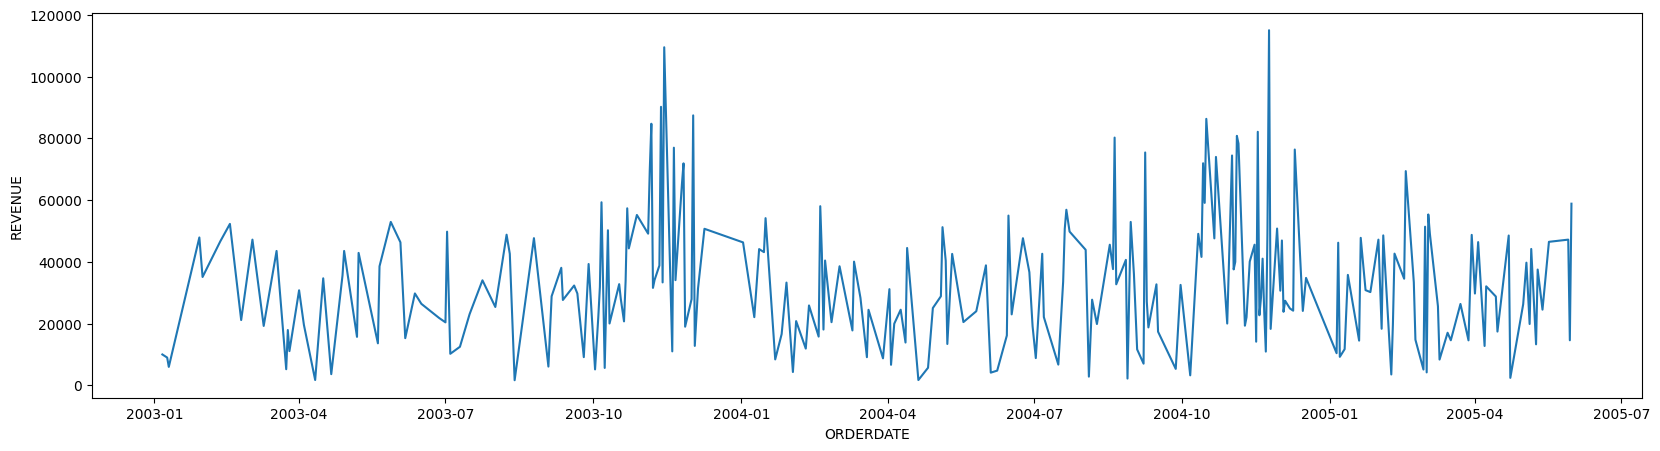

In [57]:
plt.rcParams['figure.figsize'] = (20,5)
sns.lineplot(data = agg_daily, x = 'ORDERDATE', y = 'REVENUE')

In [83]:
agg_monthly = agg_daily.groupby(agg_daily['ORDERDATE'].dt.to_period('M')).sum(numeric_only=True)
agg_monthly_sorted = agg_monthly.sort_values('REVENUE', ascending=False)
agg_monthly_sorted.head()

,REVENUE
ORDERDATE,
2004-11,894479.18
2003-11,850203.27
2003-10,466240.57
2004-10,452796.13
2004-08,386106.59


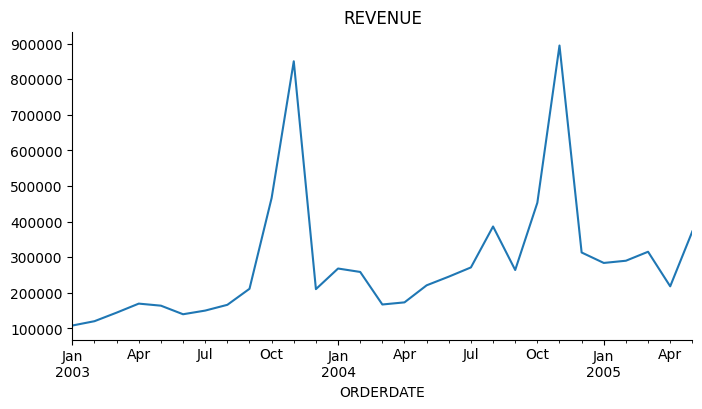

In [84]:
from matplotlib import pyplot as plt
agg_monthly['REVENUE'].plot(kind='line', figsize=(8, 4), title='REVENUE')
plt.gca().spines[['top', 'right']].set_visible(False)

Insight: Based on the chart, it's clear that the monthly trend provides a more distinct pattern. Notably, the highest sales occur in November.

Recommendation: To capitalize this trend, I recommend implementing a year-end holiday marketing campaign. Leveraging the holiday season, especially during October and December, can attract more buyers and potentially boost sales.

Further more, we also identify historically low-sales months. From this months, we can focus to optimize marketing strategies. Consider running special promotions or discounts during low-sales months. These can attract customer attention and increase sales. Create marketing campaign relevant to spesific seasons or celebrations. For example, in the February for Christmast or in January for New Year campaigns. Monitor the outcomes of implemented strategies to know how the sales performance meet the set targets.

In [ ]:
# @title How does deal size correlate with total sales? What is the percentage of contribution for each type of deal?

In [110]:
df_cleaned.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERDATE', 'STATUS',
       'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY', 'DEALSIZE',
       'REVENUE'],
      dtype='object')

In [124]:
deal_size_sales = df.groupby('DEALSIZE')['QUANTITYORDERED'].sum().reset_index()
deal_size_sales

,DEALSIZE,QUANTITYORDERED
0,Large,7414
1,Medium,52519
2,Small,39162


In [126]:
deal_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['DEALSIZE_NUM'] = df['DEALSIZE'].map(deal_size_mapping)

In [128]:
# percentage of contribution for each dealsize
deal_size_sales['PERCENTAGE'] = (deal_size_sales['QUANTITYORDERED'] / deal_size_sales['QUANTITYORDERED'].sum()) * 100
deal_size_sales['PERCENTAGE']

0     7.481709
1    52.998638
2    39.519653
Name: PERCENTAGE, dtype: float64

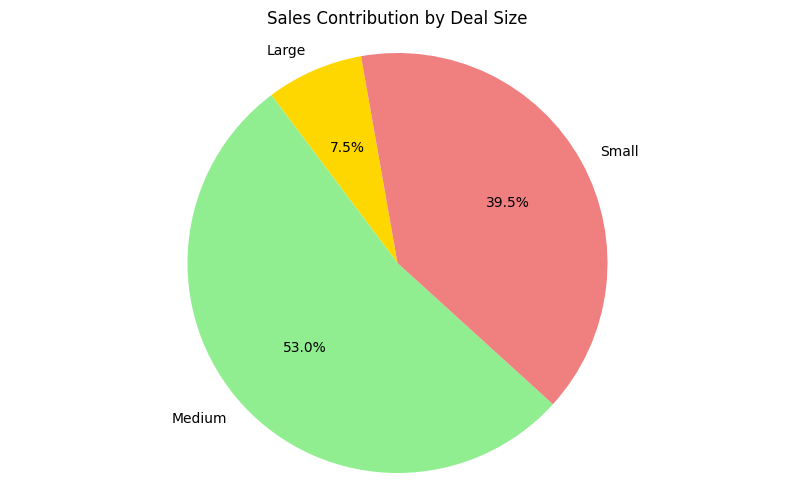

In [129]:
plt.figure(figsize=(10, 6))
plt.pie(deal_size_sales['QUANTITYORDERED'], labels=deal_size_sales['DEALSIZE'], autopct='%1.1f%%', startangle=100, colors=['gold', 'lightgreen', 'lightcoral'])
plt.title('Sales Contribution by Deal Size')
plt.axis('equal')
plt.show()

insight:
The pie chart shows the sales contribution by deal size. From the chart, we know that medium deal size contribute the most for 53%, small deals contribute 39.5% of total sales and large delas contribute the least, accounting for 7.5% of total sales.

Recommendation:
Focus on strategies to increase the number of large deals while maintaining or improving the medium and small deal sales. Set target to increase the contribution of large deals from 7.5% to at least 15% within the next year. This can be measured by tracking the proportion of sales from each deal size company. We can also implement targeted marketing campaigns aimed at larger clients. Ensure that the goal of increasing large deals aligns with the company's overall growth strategy and revenue targets. This may involve enhancing product offerings, improving customer relationships. Aim to reach the target to increaseing the large deal size, break down into quarterly milestone to monitor the progress and make adjustments as needed